In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from collections import defaultdict
from itertools import product
from functools import wraps
import json
import re
import os
from os.path import isdir, join

In [3]:
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
from joblib import delayed, Parallel
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib_pretty_tex as pgf

In [4]:
import utils
sns.set_context('paper', font_scale=1.4, rc={'legend.frameon': True})

In [5]:
out_dir = join('output/further_studies/cross_checks')
if not isdir(out_dir):
    os.makedirs(out_dir)
clusters, tracks, residuals, particles = utils.load(None, fast=True)
scenarios = list(particles.scenario.cat.categories.values)

In [11]:
sigma = {
    0.5: 0.382924922548026,
    1: 0.682689492137086,
    2: 0.954499736103642,
    3: 0.997300203936740
}
bins = np.linspace(-0.2, 0.2, 100)
sns.set_palette(sns.color_palette('colorblind', len(scenarios)))
sns.set_style('whitegrid')

In [67]:
df.query('module == 10').sensor.unique(), df.query('module == 51').sensor.unique()

(array([42, 41, 40, 43]), array([207, 206, 205, 204]))

## How does the track desnsity look both close to and far from the PV

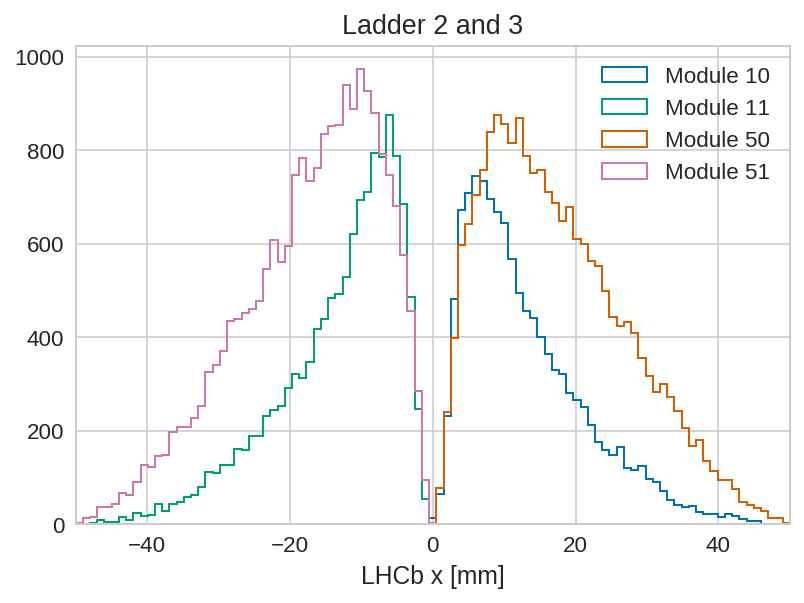

In [84]:
df = residuals['Original_DB']
_bins = np.linspace(-50, 50, 100)
df.query('(sensor >= 10*4+2) & (sensor < (10+1)*4)').intercept_x.hist(histtype='step', lw=1, bins=_bins, label='Module 10')
df.query('(sensor >= 11*4+2) & (sensor < (11+1)*4)').intercept_x.hist(histtype='step', lw=1, bins=_bins, label='Module 11')
df.query('(sensor >= 50*4+2) & (sensor < (50+1)*4)').intercept_x.hist(histtype='step', lw=1, bins=_bins, label='Module 50')
df.query('(sensor >= 51*4+2) & (sensor < (51+1)*4)').intercept_x.hist(histtype='step', lw=1, bins=_bins, label='Module 51')
plt.legend(loc='best')
plt.xlim(min(_bins), max(_bins))
plt.xlabel('LHCb x [mm]')
plt.title('Ladder 2 and 3')

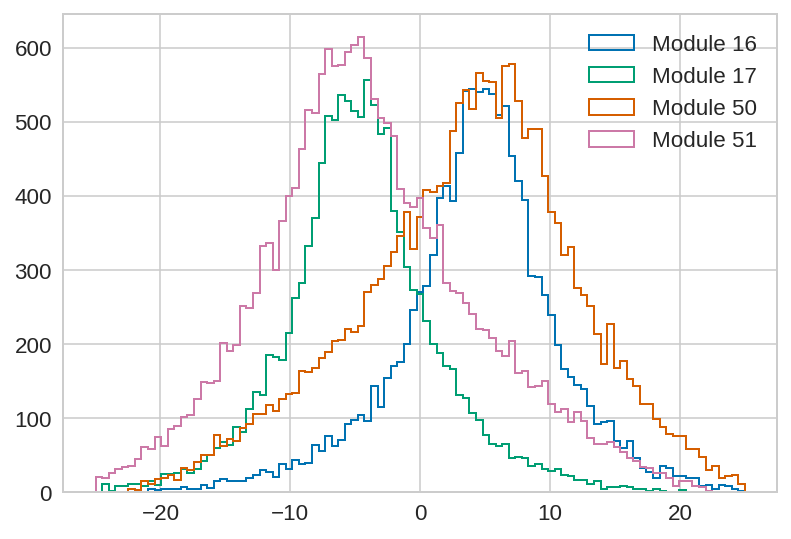

In [83]:
df = residuals['Original_DB']
_bins = np.linspace(-25, 25, 100)
df.query('(sensor >= 16*4) & (sensor < (16+1)*4-2)').intercept_x.hist(histtype='step', lw=1, bins=_bins, label='Module 16')
df.query('(sensor >= 17*4) & (sensor < (17+1)*4-2)').intercept_x.hist(histtype='step', lw=1, bins=_bins, label='Module 17')
df.query('(sensor >= 50*4) & (sensor < (50+1)*4-2)').intercept_x.hist(histtype='step', lw=1, bins=_bins, label='Module 50')
df.query('(sensor >= 51*4) & (sensor < (51+1)*4-2)').intercept_x.hist(histtype='step', lw=1, bins=_bins, label='Module 51')
plt.legend(loc='best')
plt.xlim(min(_bins), max(_bins))
plt.xlabel('LHCb x [mm]')
plt.title('Ladder 0 and 1')

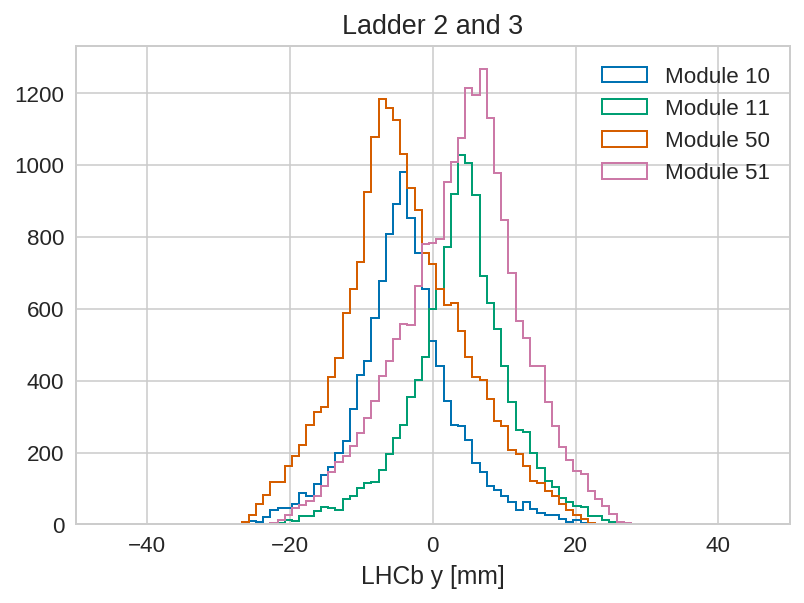

In [85]:
df = residuals['Original_DB']
_bins = np.linspace(-50, 50, 100)
df.query('(sensor >= 10*4+2) & (sensor < (10+1)*4)').intercept_y.hist(histtype='step', lw=1, bins=_bins, label='Module 10')
df.query('(sensor >= 11*4+2) & (sensor < (11+1)*4)').intercept_y.hist(histtype='step', lw=1, bins=_bins, label='Module 11')
df.query('(sensor >= 50*4+2) & (sensor < (50+1)*4)').intercept_y.hist(histtype='step', lw=1, bins=_bins, label='Module 50')
df.query('(sensor >= 51*4+2) & (sensor < (51+1)*4)').intercept_y.hist(histtype='step', lw=1, bins=_bins, label='Module 51')
plt.legend(loc='best')
plt.xlim(min(_bins), max(_bins))
plt.xlabel('LHCb y [mm]')
plt.title('Ladder 2 and 3')

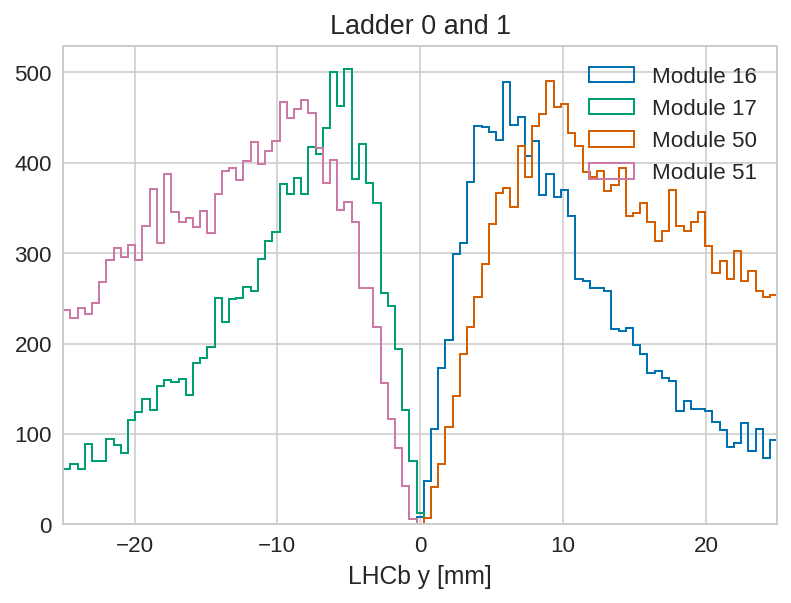

In [86]:
df = residuals['Original_DB']
_bins = np.linspace(-25, 25, 100)
df.query('(sensor >= 16*4) & (sensor < (16+1)*4-2)').intercept_y.hist(histtype='step', lw=1, bins=_bins, label='Module 16')
df.query('(sensor >= 17*4) & (sensor < (17+1)*4-2)').intercept_y.hist(histtype='step', lw=1, bins=_bins, label='Module 17')
df.query('(sensor >= 50*4) & (sensor < (50+1)*4-2)').intercept_y.hist(histtype='step', lw=1, bins=_bins, label='Module 50')
df.query('(sensor >= 51*4) & (sensor < (51+1)*4-2)').intercept_y.hist(histtype='step', lw=1, bins=_bins, label='Module 51')
plt.legend(loc='best')
plt.xlim(min(_bins), max(_bins))
plt.xlabel('LHCb y [mm]')
plt.title('Ladder 0 and 1')

# Cross-checks

## Cluster residual $x$

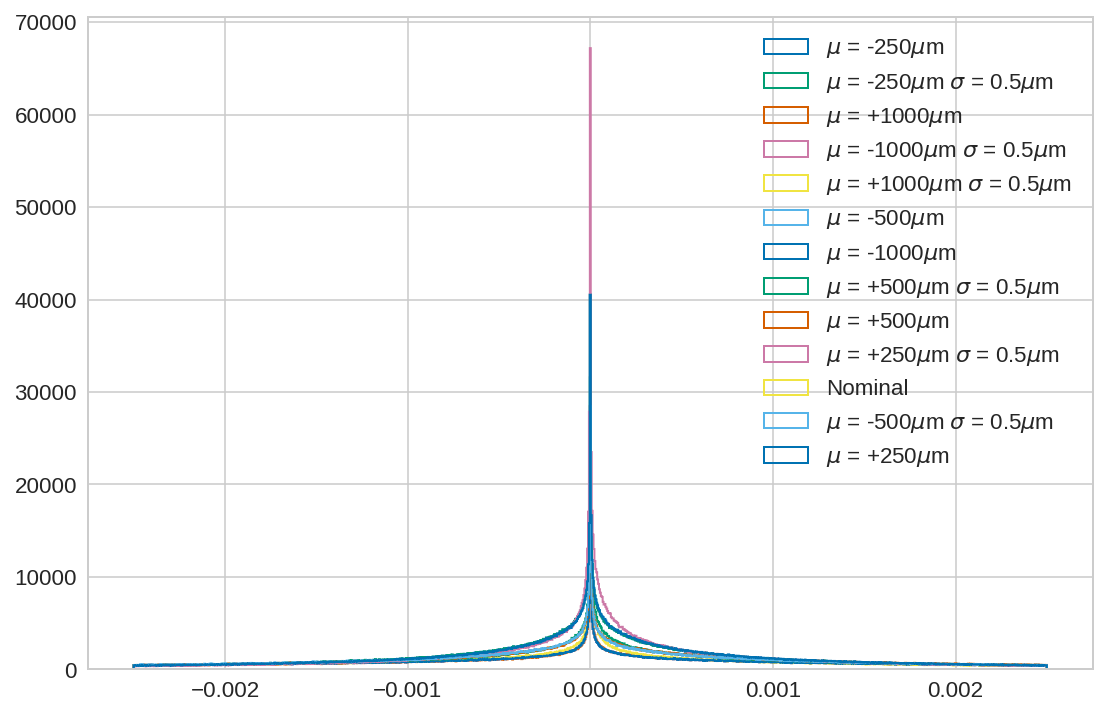

In [46]:
_bins = np.linspace(-0.0025, 0.0025, 1000)
plt.figure(figsize=[9,6])
for s in residuals:
    residuals[s].eval('intercept_x - true_intercept_x').hist(bins=_bins, histtype='step', lw=1, label=utils.format_label(s))
plt.legend(loc='best')

## Cluster residual $y$

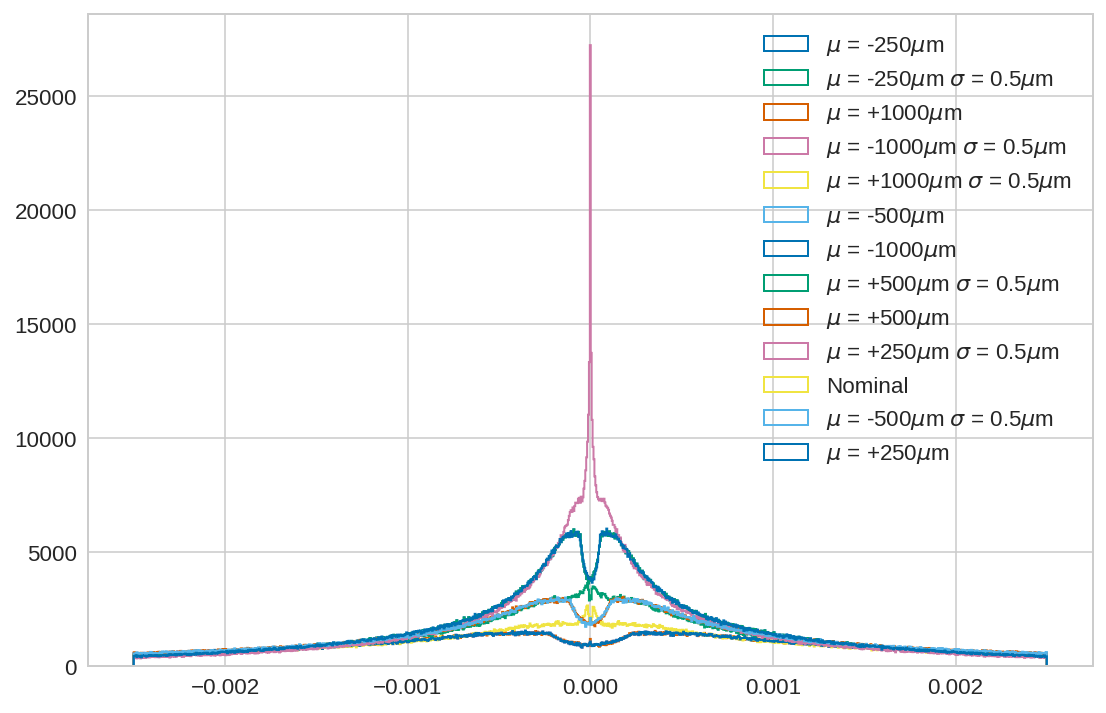

In [45]:
_bins = np.linspace(-0.0025, 0.0025, 1000)
plt.figure(figsize=[9,6])
for s in residuals:
    residuals[s].eval('intercept_y - true_intercept_y').hist(bins=_bins, histtype='step', lw=1, label=utils.format_label(s))
plt.legend(loc='best')

## Cluster residual $z$

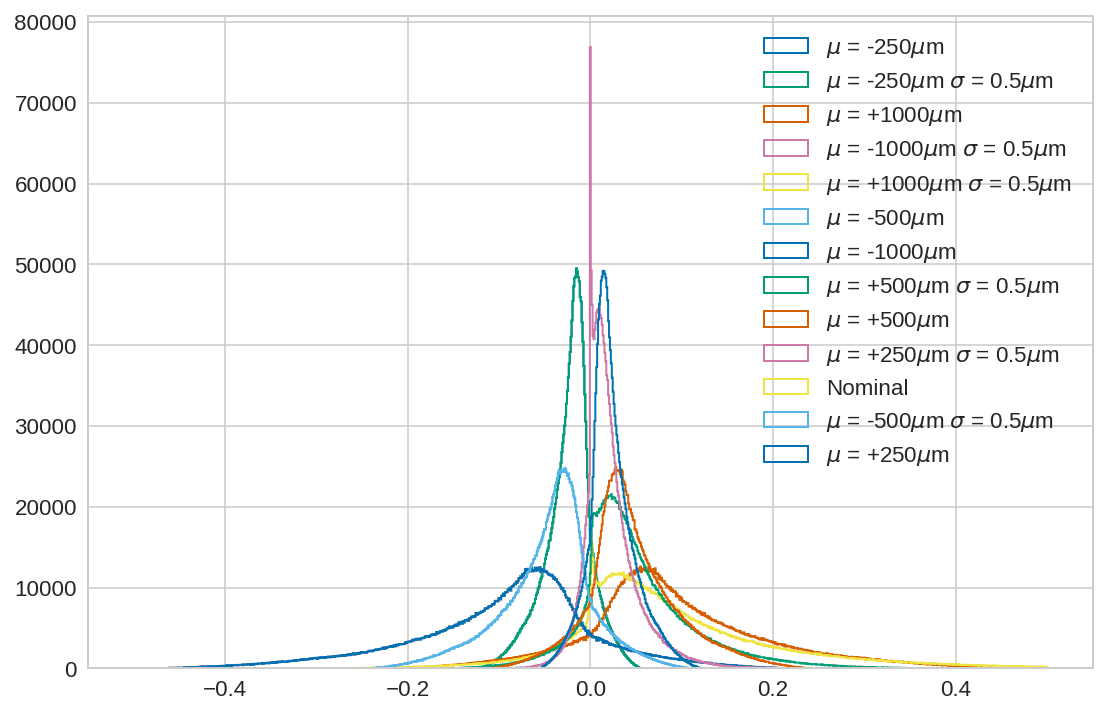

In [44]:
_bins = np.linspace(-0.5, 0.5, 1000)
plt.figure(figsize=[9,6])
for s in residuals:
    residuals[s].eval('intercept_z - true_intercept_z').hist(bins=_bins, histtype='step', lw=1, label=utils.format_label(s))
plt.legend(loc='best')

In [26]:
def plot_cluster_residual(var, selection=lambda s: True):
    _bins = np.linspace(-0.5, 0.5, 1000)
    with sns.color_palette('colorblind', 6):
        plt.figure(figsize=[9, 6], dpi=200)
        ls = ['-', '--', 'dotted']
        alpha = [1, 0.75, 0.5]
        for i, s in enumerate(filter(selection, residuals), start=1):
            residuals[s].eval(f'{var} - true_{var}').hist(
                bins=_bins, histtype='step', lw=1, alpha=alpha[int(i/6)], ls=ls[int(i/6)], label=utils.format_label(s))
        plt.legend(loc='best')
    plt.xlim(_bins[0], _bins[-1])
    plt.xlabel(f'{var} [mm]')

## Cluster residual for "all same" distortions

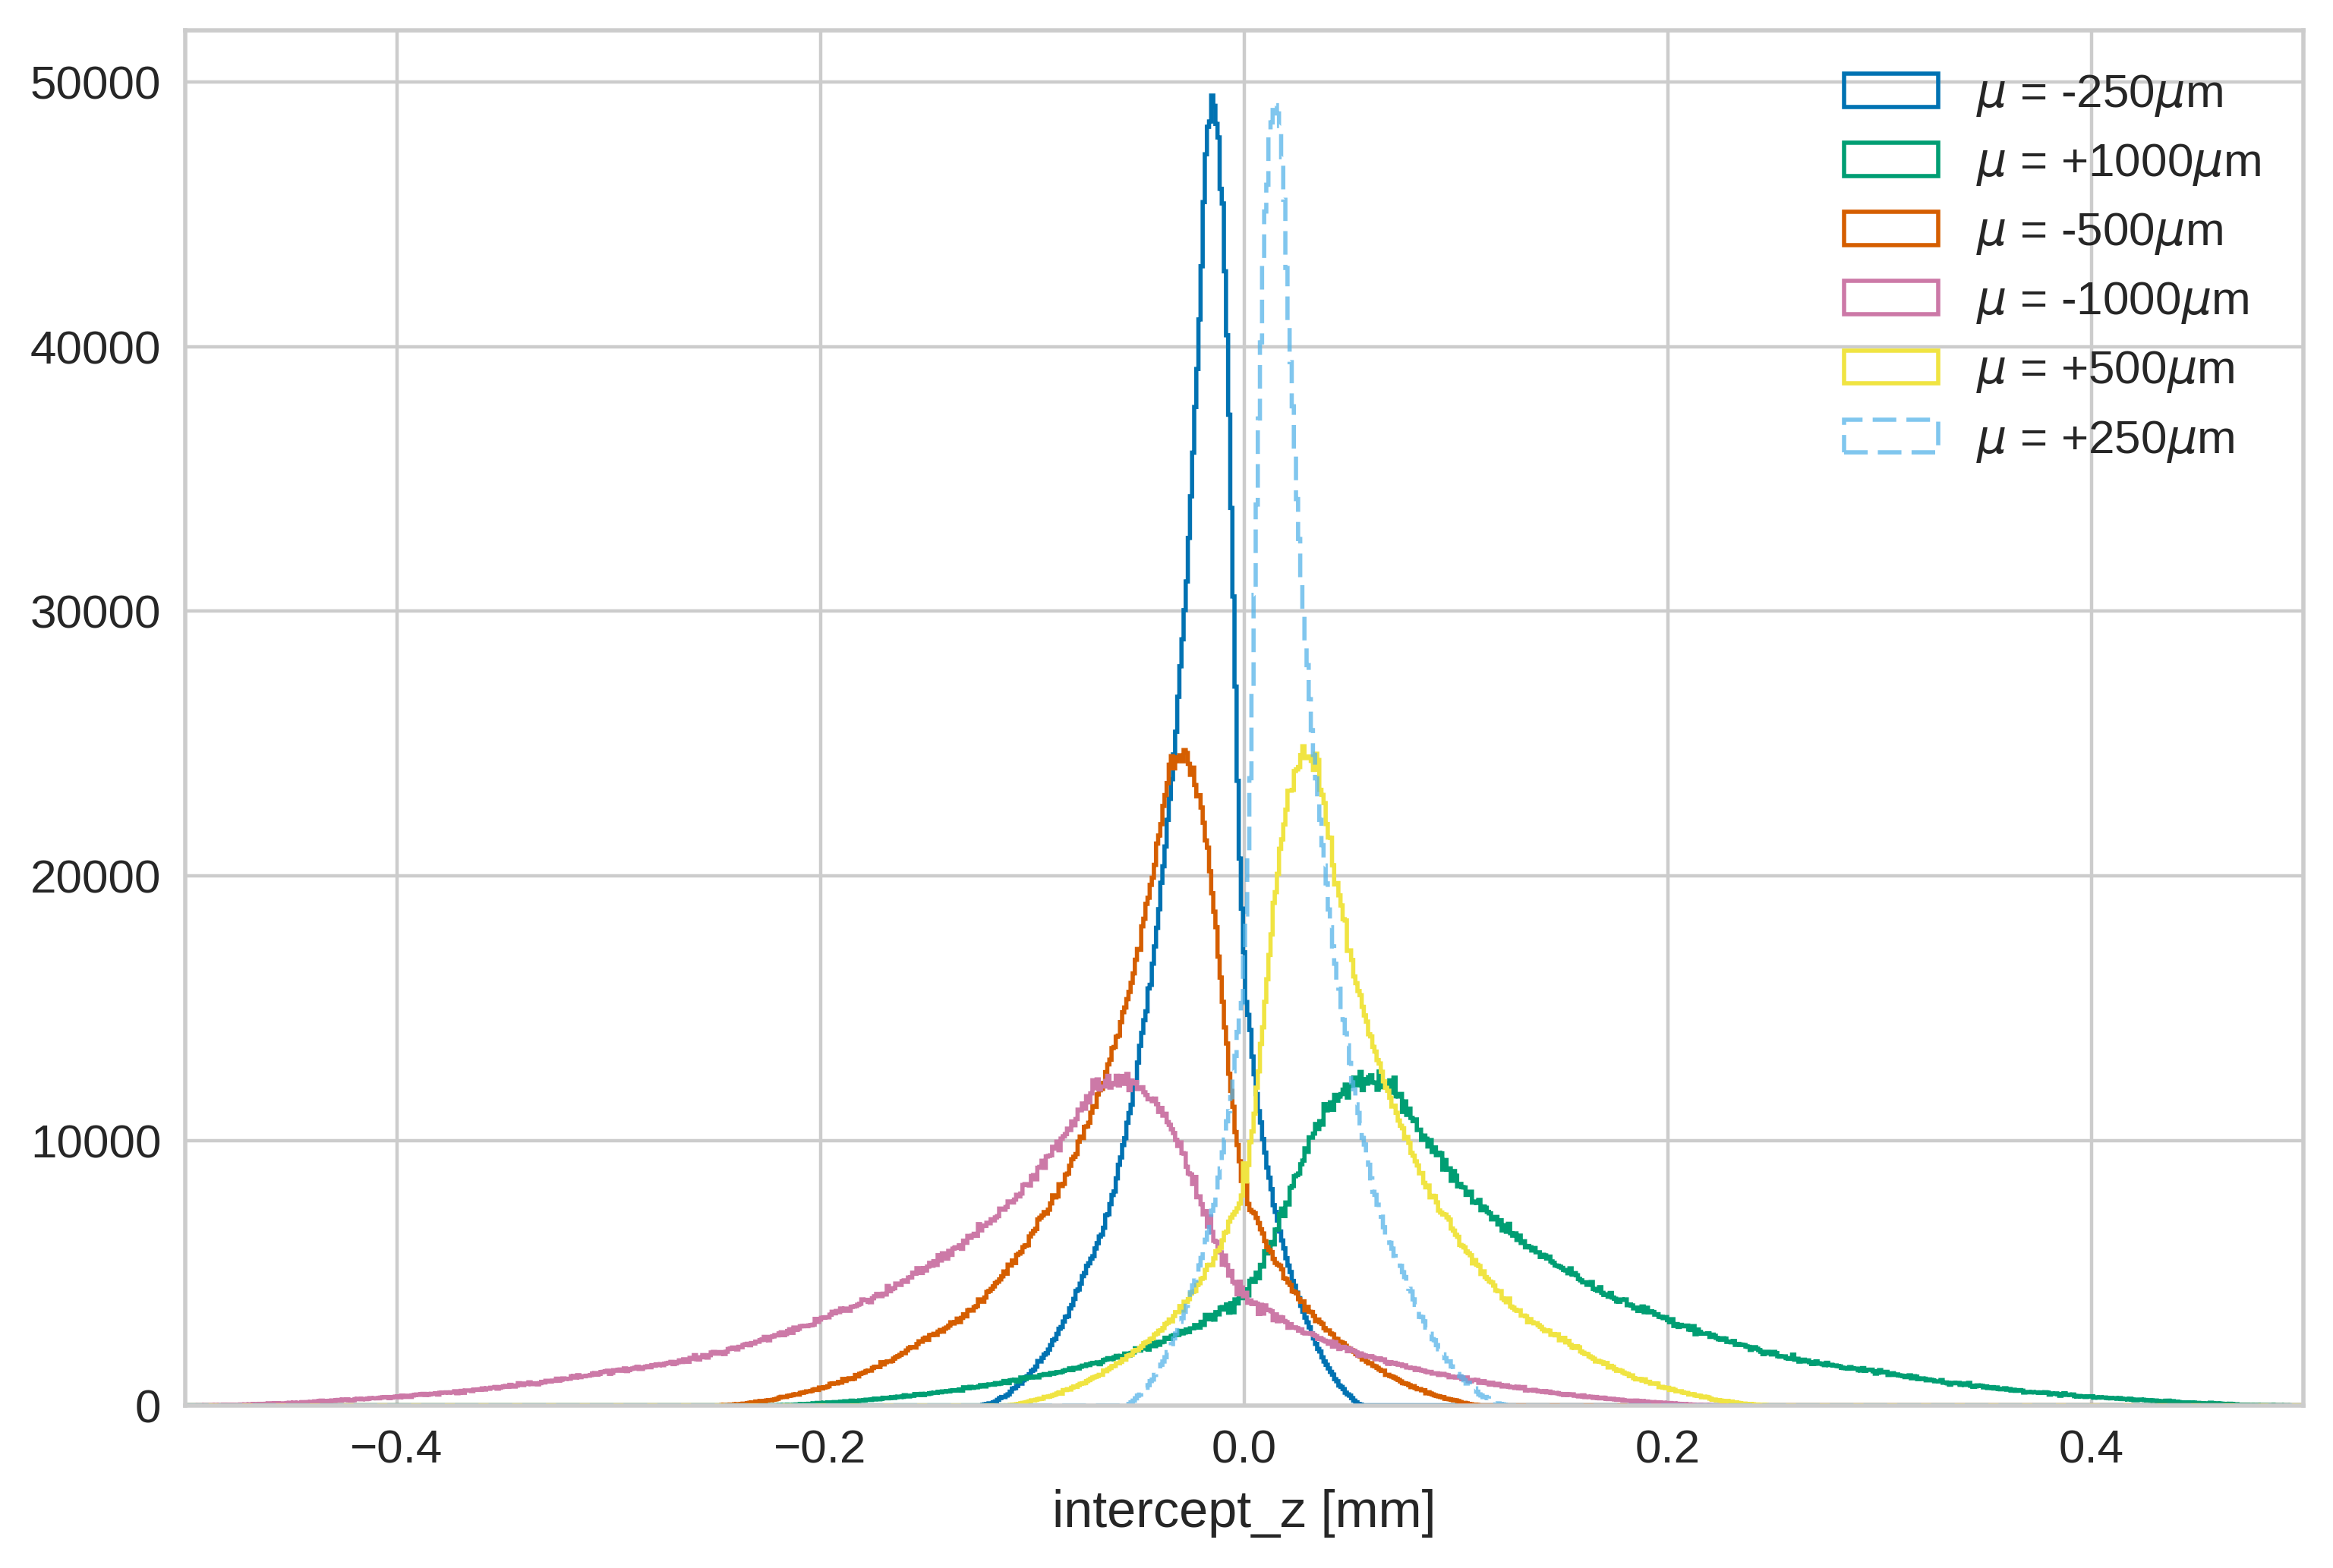

In [27]:
plot_cluster_residual('intercept_z', selection=lambda s: 'sigma' not in s and 'Original' not in s)

## Cluster residual for random distortions

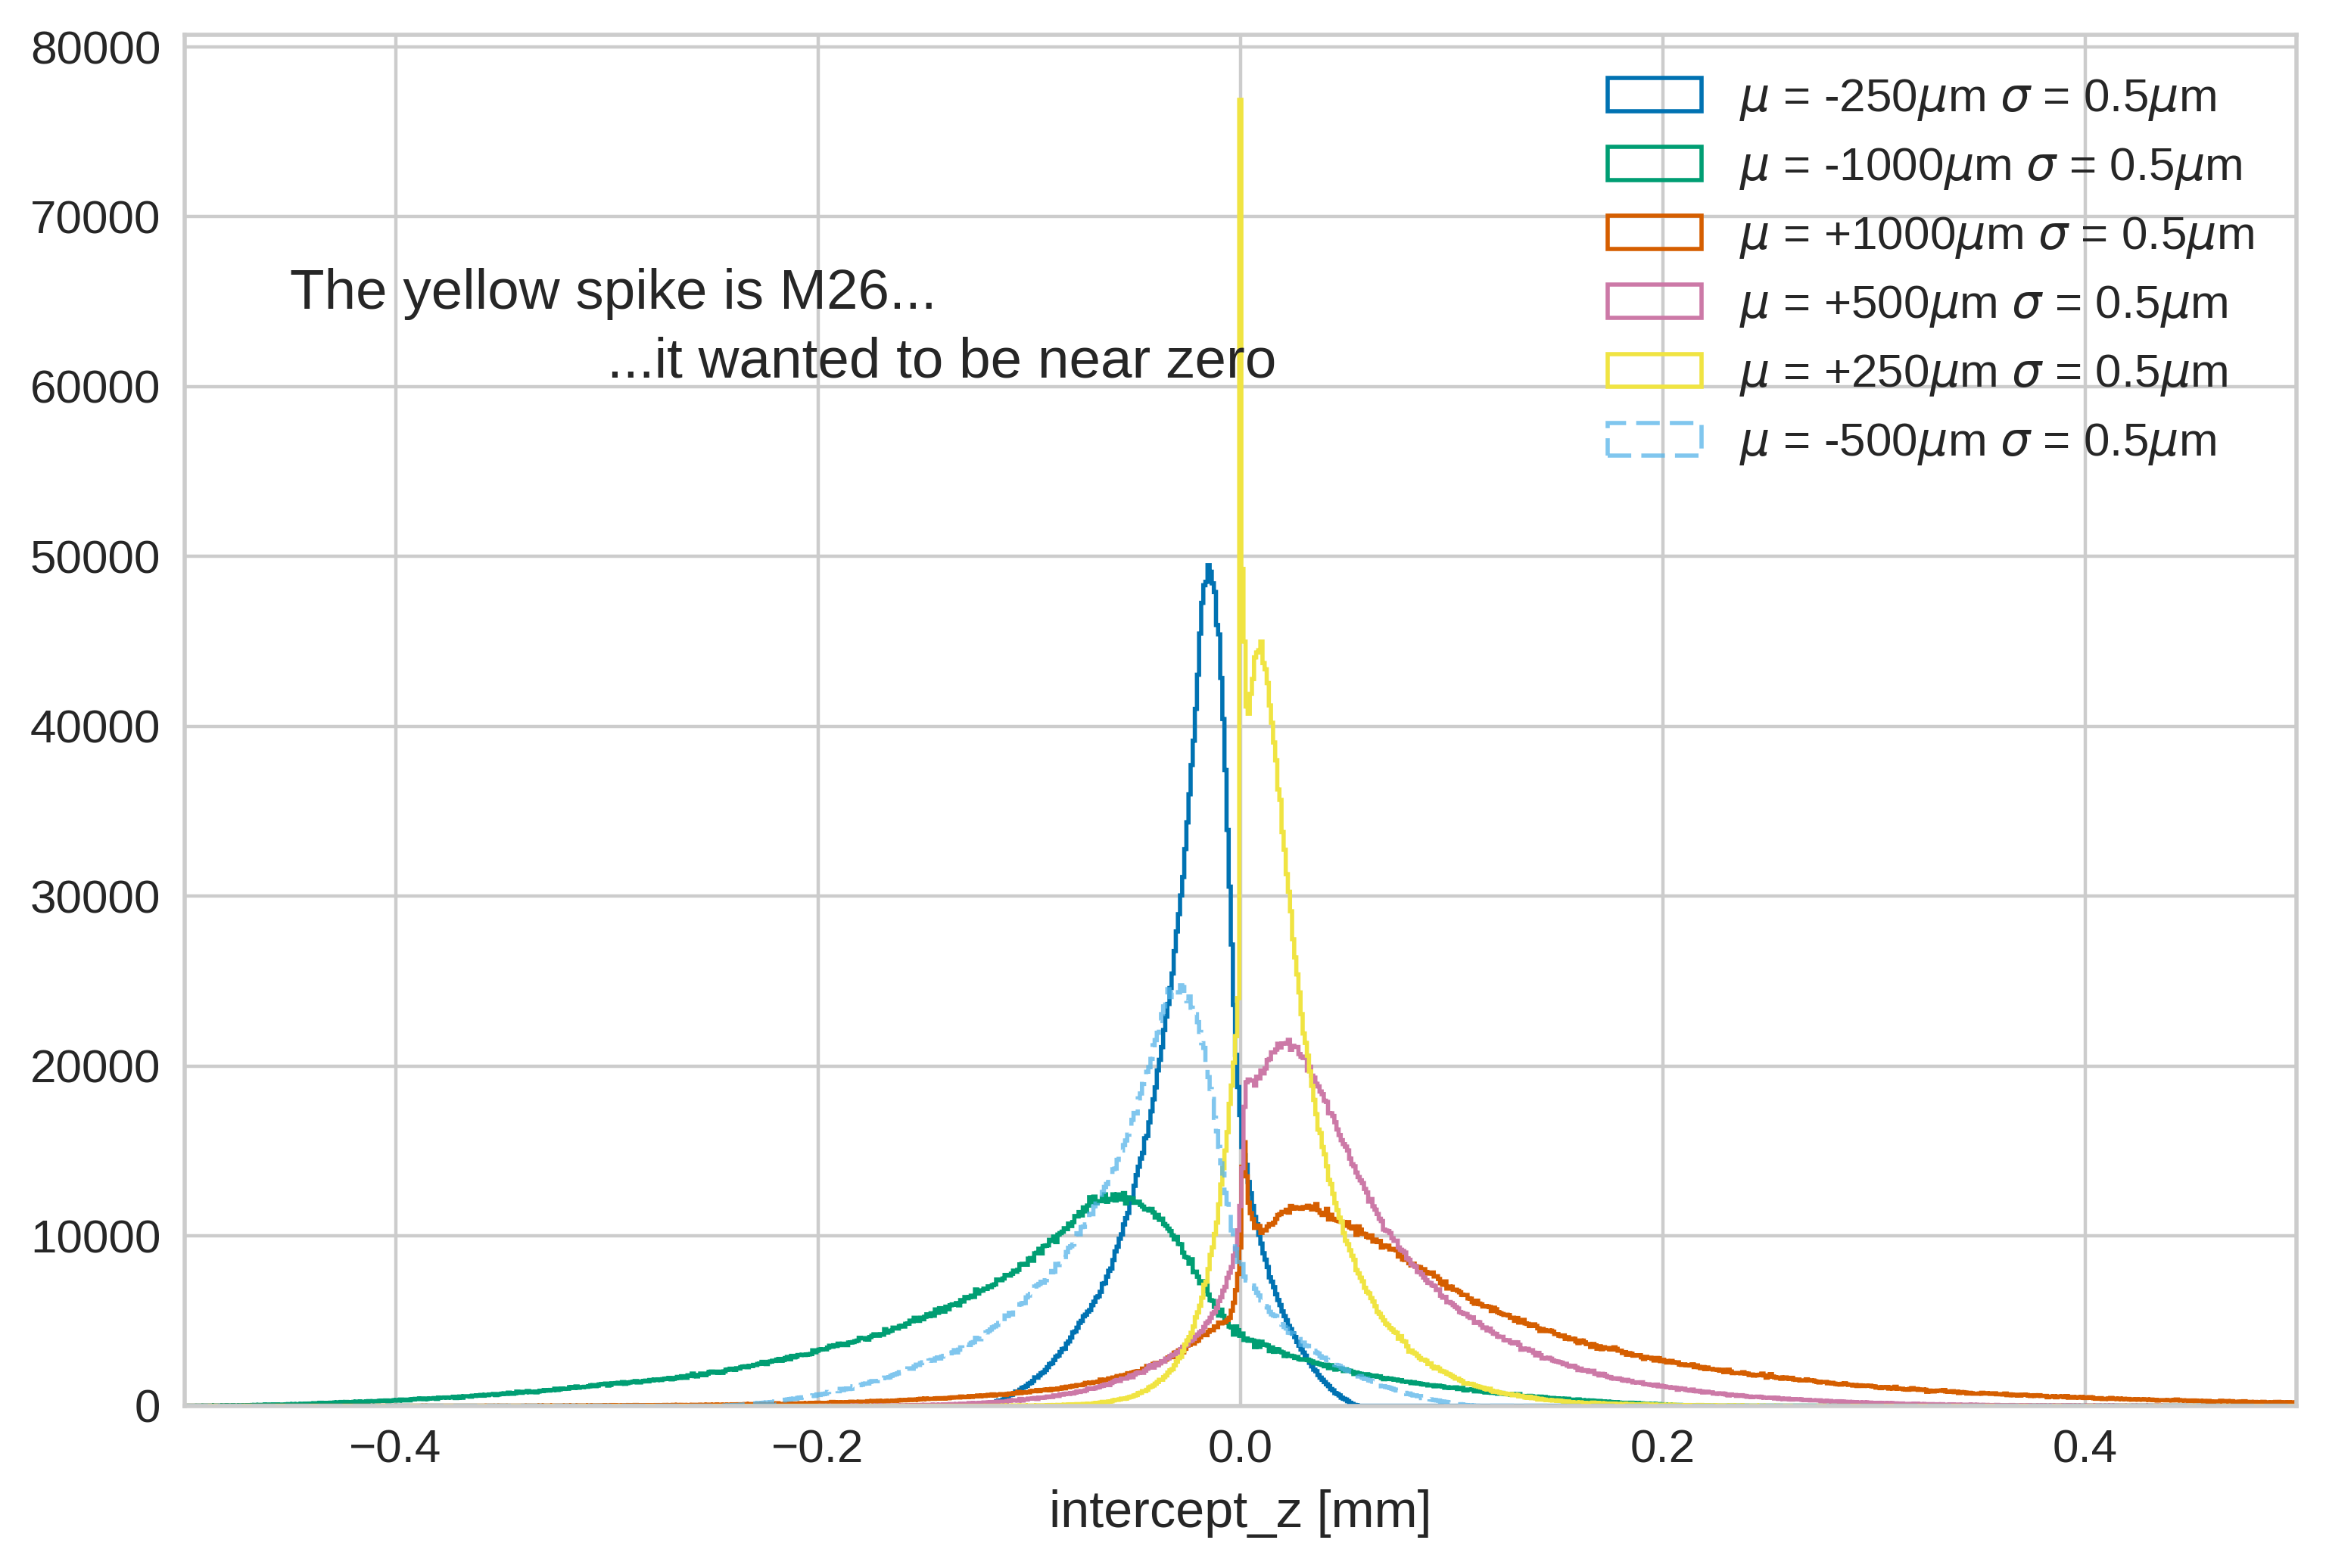

In [28]:
plot_cluster_residual('intercept_z', selection=lambda s: 'sigma' in s and 'Original' not in s)
plt.text(-0.45, plt.ylim()[1]*0.8, 'The yellow spike is M26...')
plt.text(-0.3, plt.ylim()[1]*0.75, '...it wanted to be near zero')

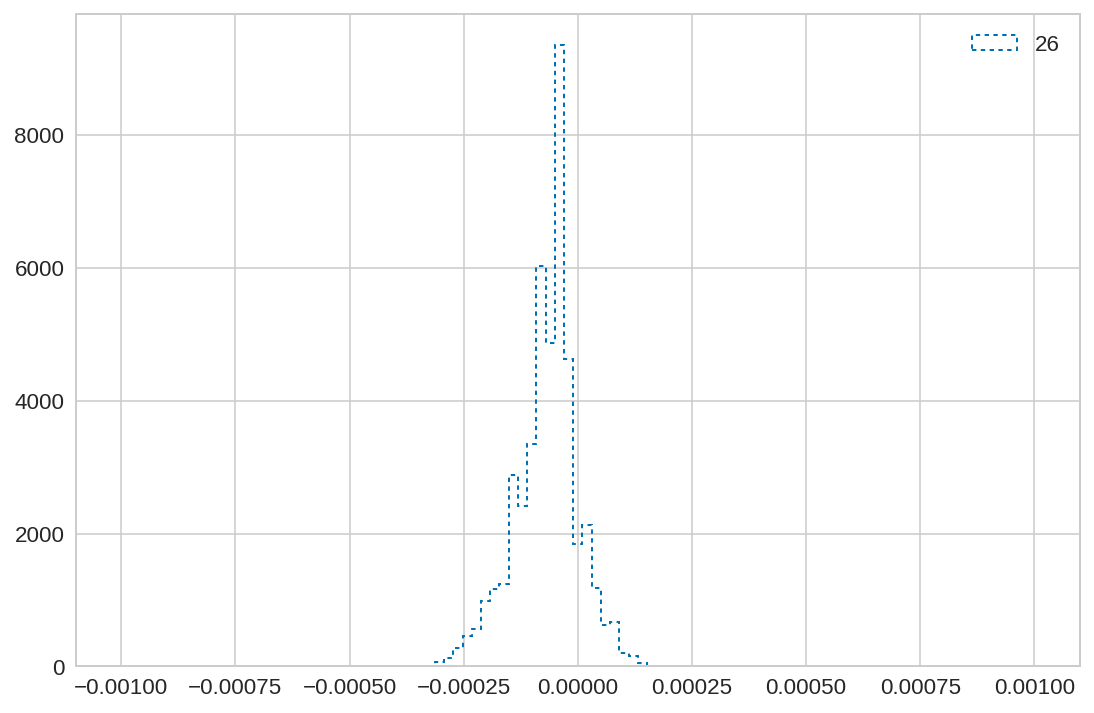

In [39]:
_bins = np.linspace(-0.001, 0.001, 100)
d = residuals['tip_x=0um_y=+250um_sigma=0.5']
ls = ['-', '--', 'dotted', 'dashdot', ':']
ls += ls
plt.figure(figsize=[9,6])
for i, df in d.groupby('module'):
    if i not in [26]:
        continue
    df.eval('intercept_z - true_intercept_z').hist(
        bins=_bins, histtype='step', lw=1, ls=ls[int(i/6)], label=str(i))
plt.legend(loc='best')

## Cluster residual for $250\mu m$ distortions

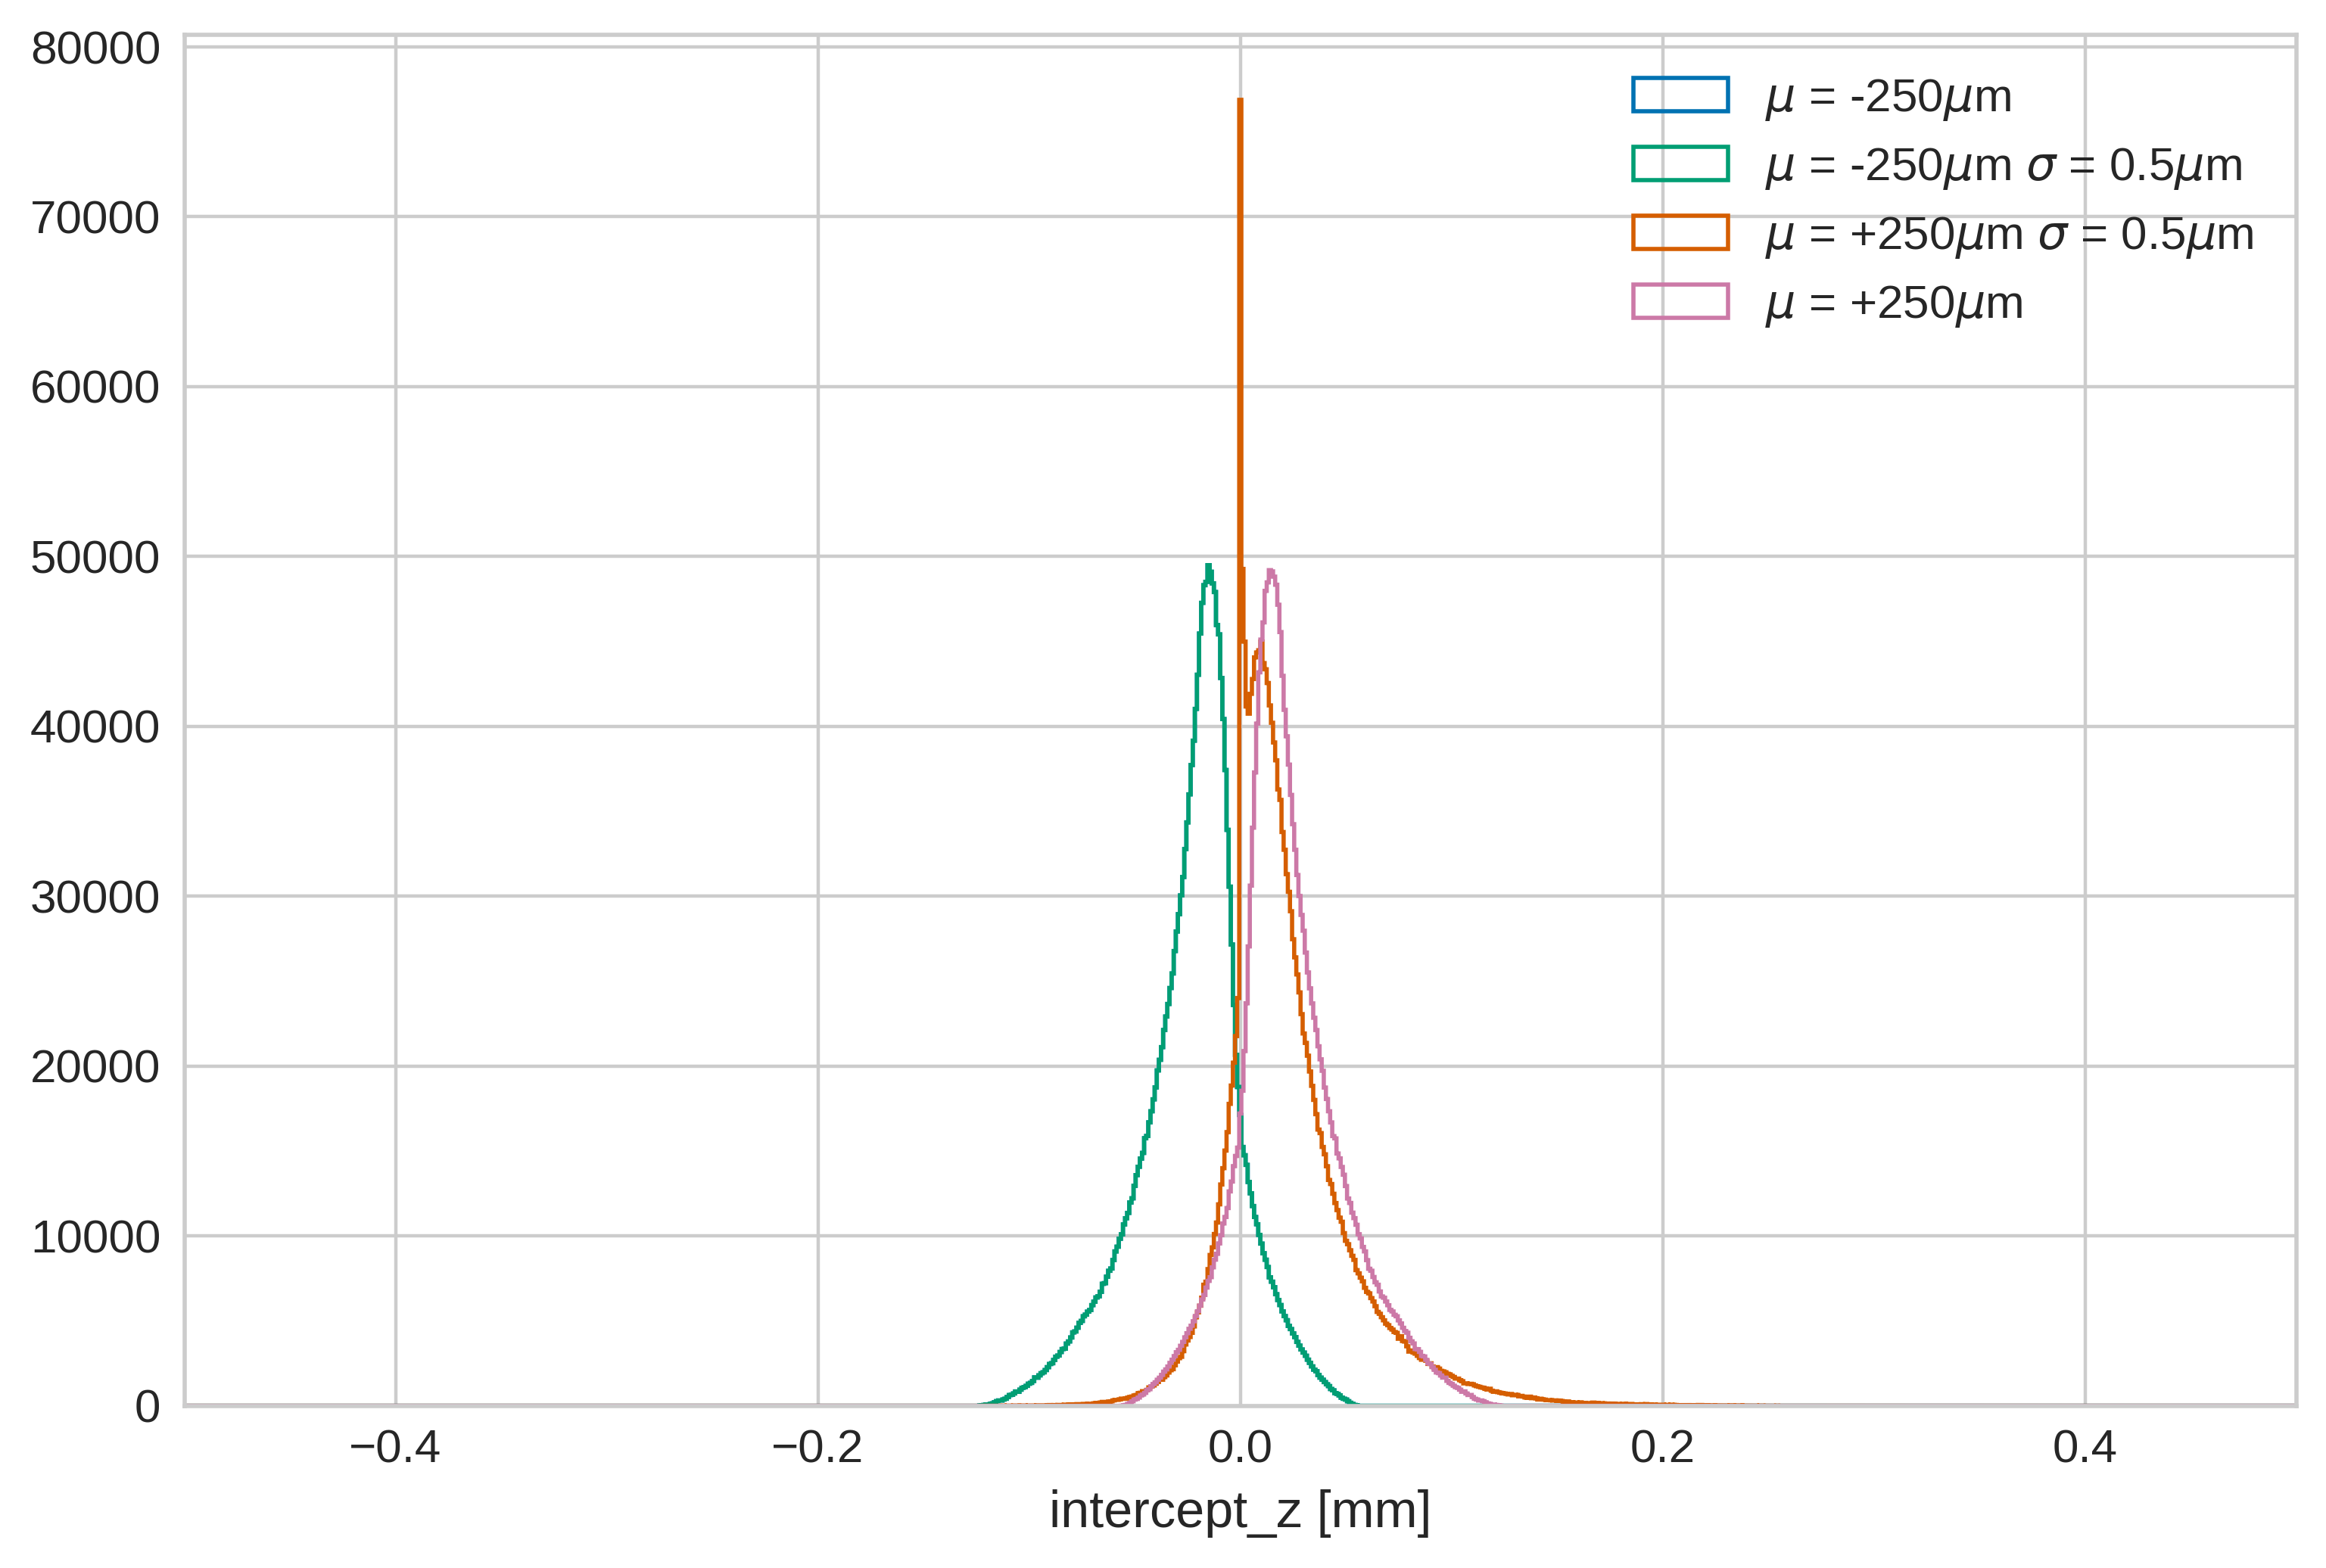

In [29]:
plot_cluster_residual('intercept_z', selection=lambda s: '250' in s and 'Original' not in s)

## Cluster residual for $500\mu m$ distortions

(-0.5, 0.5)

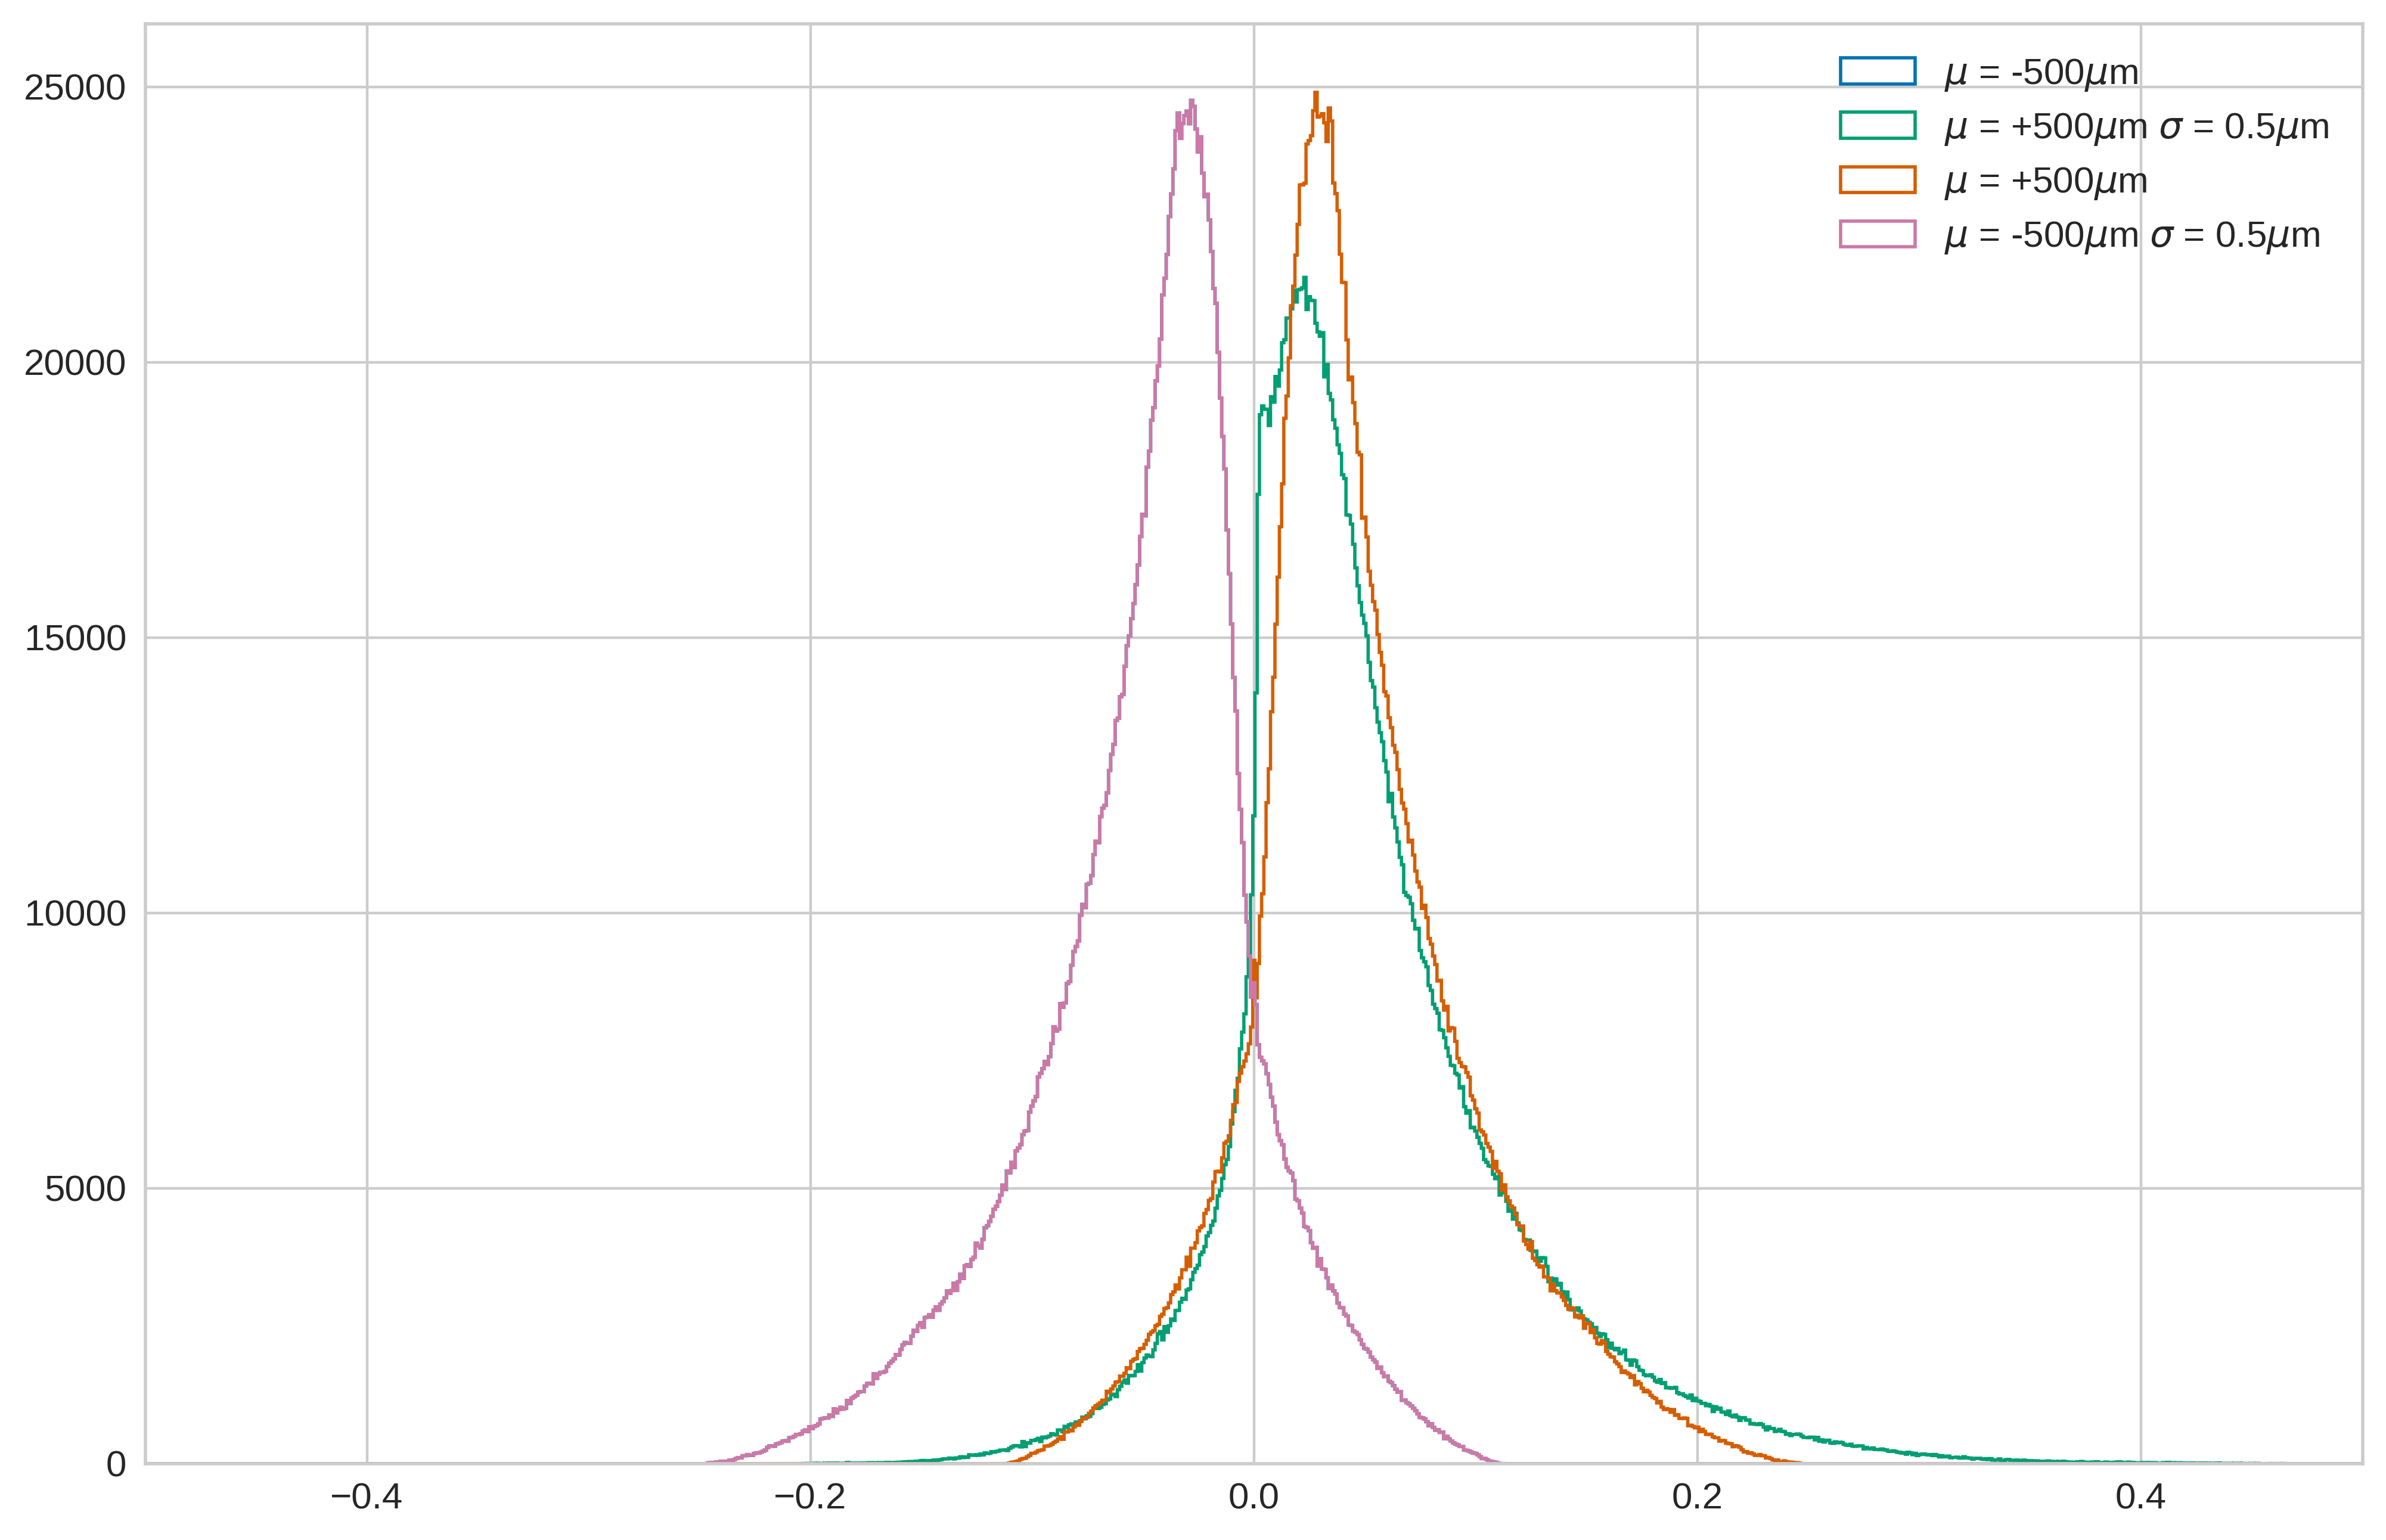

In [17]:
plot_cluster_residual('intercept_z', selection=lambda s: '500' in s and 'Original' not in s)

## Cluster residual for $1000\mu m$ distortions

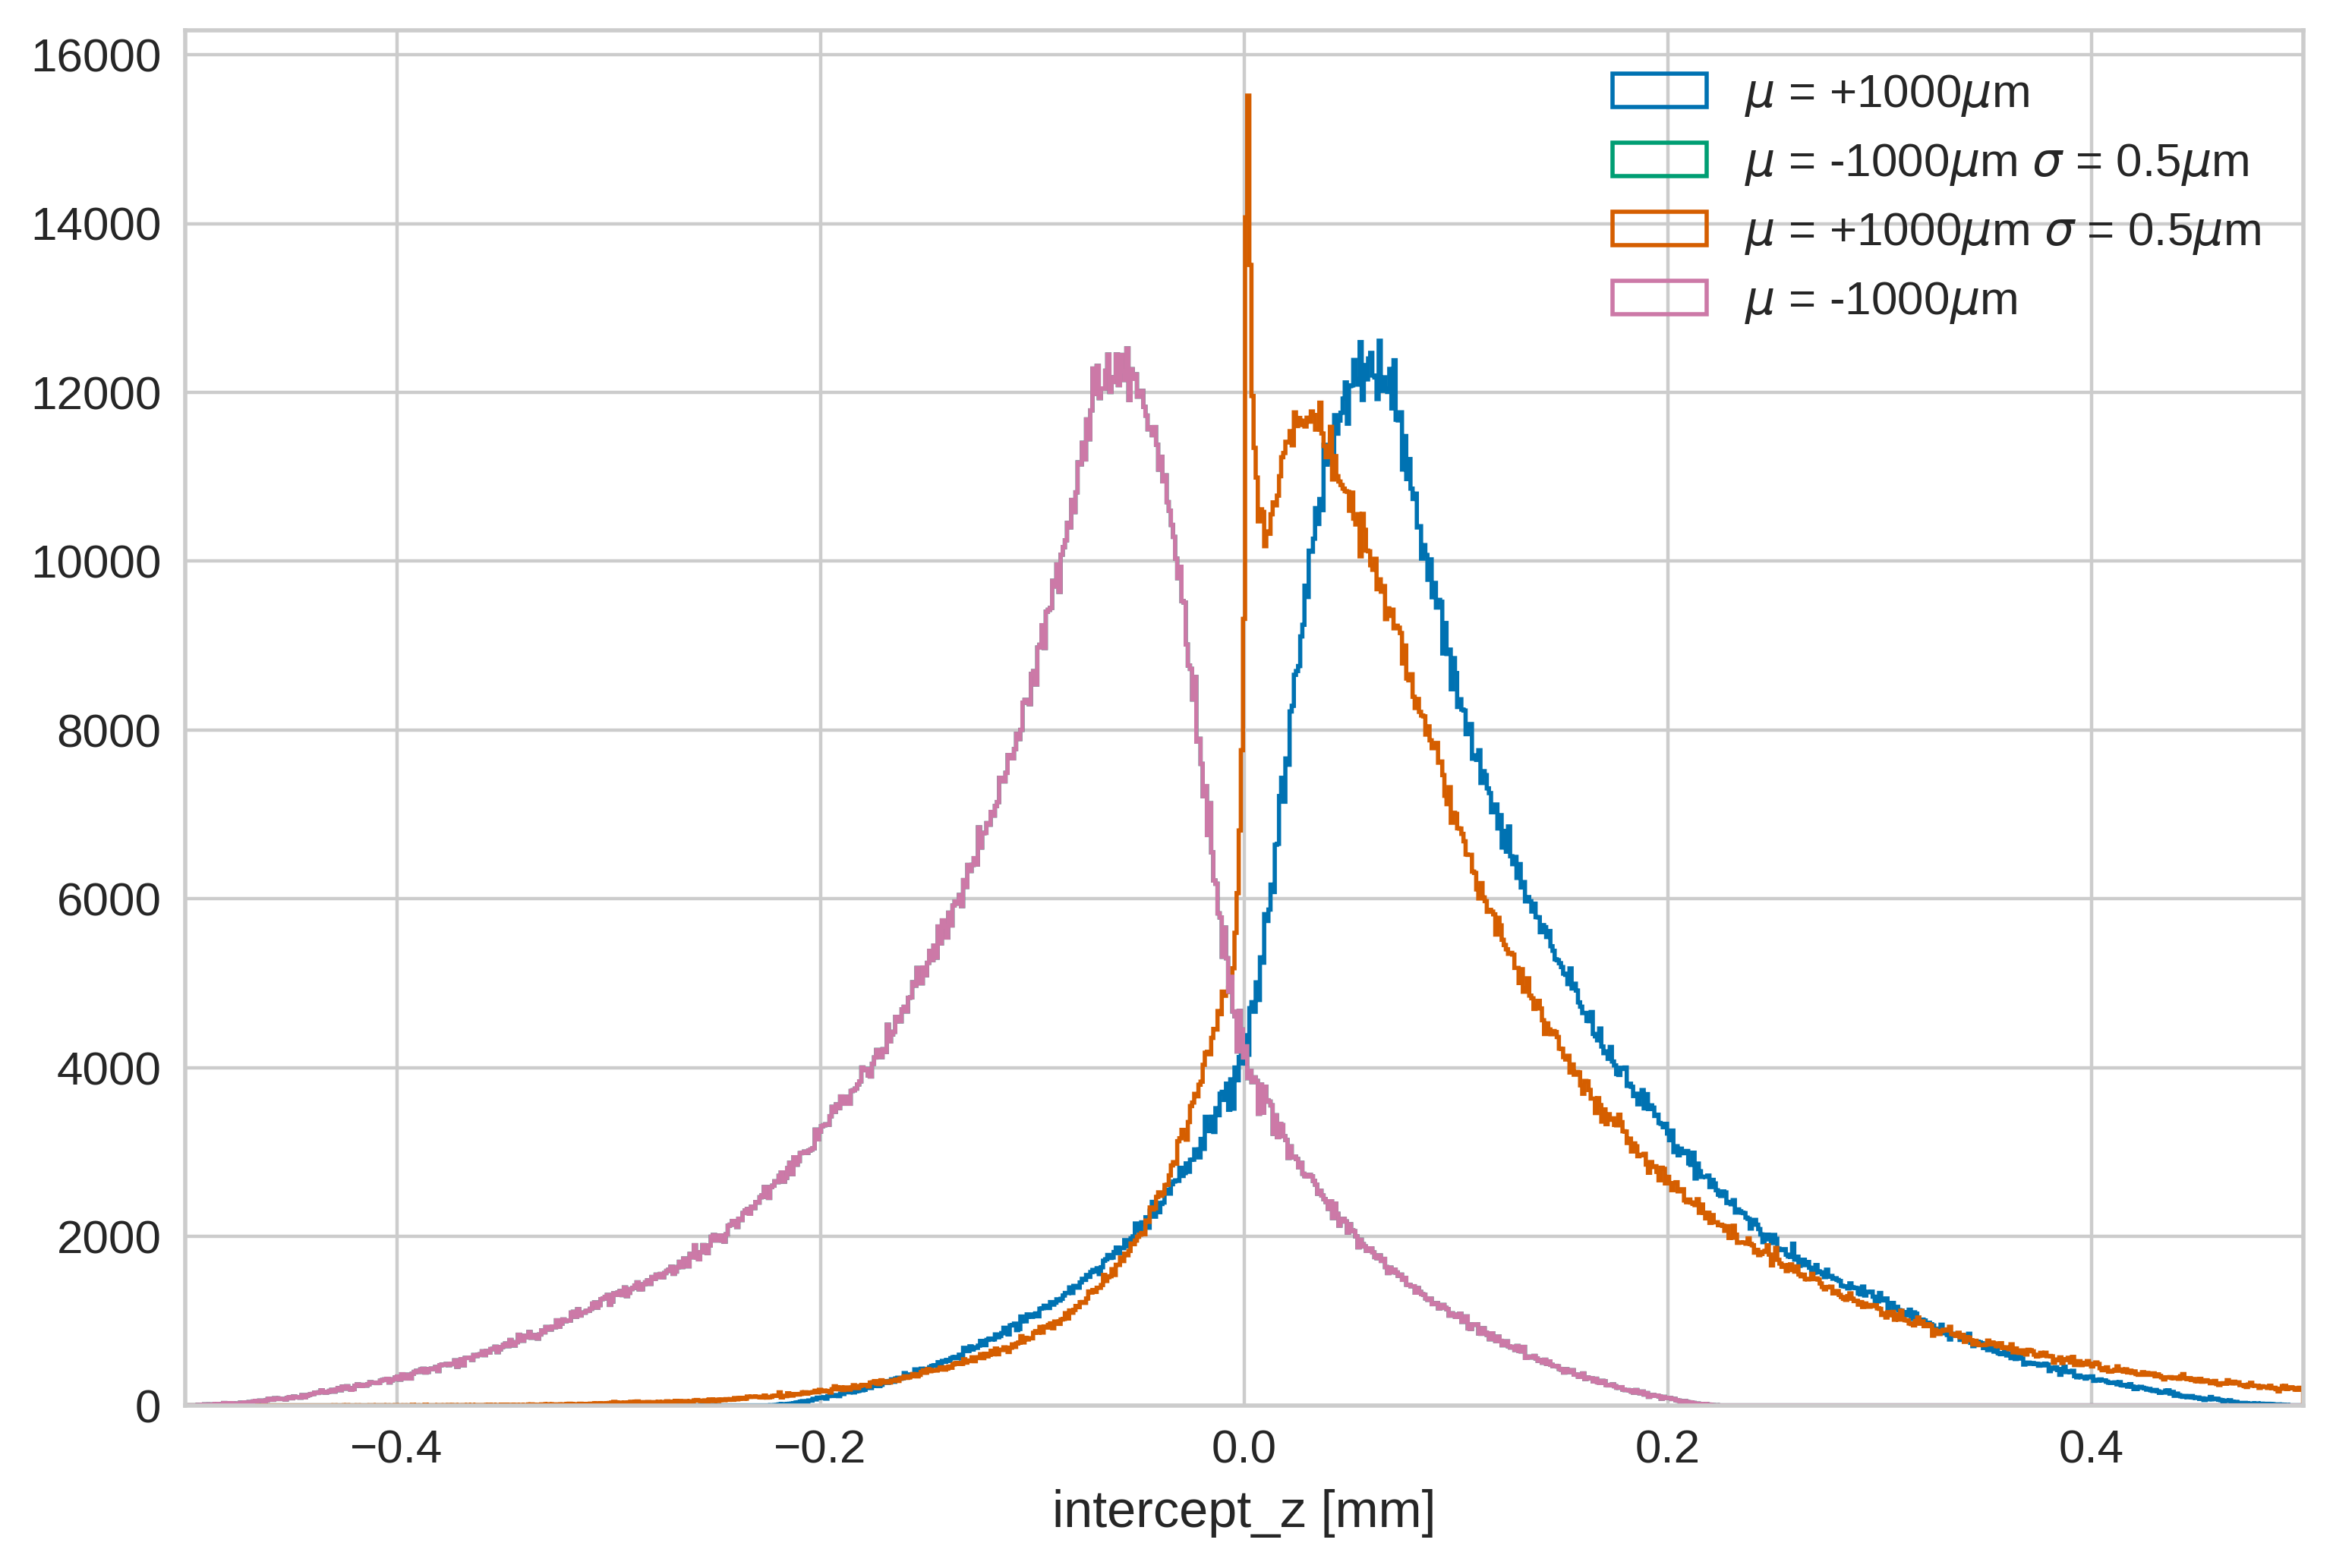

In [31]:
plot_cluster_residual('intercept_z', selection=lambda s: '1000' in s and 'Original' not in s)

## TODO